# Text Generation
Generating text with conditional probabilities

Author: Pierre Nugues

## Reading a Corpus
Utility function to read all the files in a folder

In [1]:
import os
def get_files(dir, suffix):
    """
    Returns all the files in a folder ending with suffix
    :param dir:
    :param suffix:
    :return: the list of file names
    """
    files = []
    for file in os.listdir(dir):
        if file.endswith(suffix):
            files.append(file)
    return files

## Tokenizer
An elemetary tokenizer

In [2]:
import regex as re
def tokenize(text):
    """
    Uses the letters to break the text into words.
    Returns a list of match objects
    """
    words = re.findall('\p{L}+', text)
    return words

## Reading the Files
We read a corpus of novels from Dickens or Lagerlöf

In [3]:
selma = False

In [4]:
if selma:
    folder = '/Users/pierre/Documents/Cours/EDAN20/corpus/Selma/'
else:
    folder = '/Users/pierre/Documents/Cours/EDAN20/corpus/Dickens/'
files = get_files(folder, 'txt')
files

['Hard Times.txt',
 'Oliver Twist.txt',
 'Great Expectations.txt',
 'The Old Curiosity Shop.txt',
 'A Tale of Two Cities.txt',
 'Dombey and Son.txt',
 'The Pickwick Papers.txt',
 'Bleak House.txt',
 'Our Mutual Friend.txt',
 'The Mystery of Edwin Drood.txt',
 'Nicholas Nickleby.txt',
 'David Copperfield.txt',
 'Little Dorrit.txt',
 'A Christmas Carol in Prose.txt']

We tokenize the texts

In [5]:
words = []
for file in files:
    text = open(folder + file).read().lower().strip()
    words += tokenize(text)
words[:10]

['hard',
 'times',
 'and',
 'reprinted',
 'pieces',
 'by',
 'charles',
 'dickens',
 'with',
 'illustrations']

## N-gram functions

In [6]:
def count_unigrams(words):
    frequency = {}
    for word in words:
        if word in frequency:
            frequency[word] += 1
        else:
            frequency[word] = 1
    return frequency

In [7]:
def count_bigrams(words):
    bigrams = [tuple(words[idx:idx + 2])
               for idx in range(len(words) - 1)]
    frequencies = {}
    for bigram in bigrams:
        if bigram in frequencies:
            frequencies[bigram] += 1
        else:
            frequencies[bigram] = 1
    return frequencies

### We count the unigrams and bigrams

In [8]:
unigrams = count_unigrams(words)

In [9]:
if selma:
    print(unigrams['nils'])
else:
    print(unigrams['oliver'])

877


In [10]:
bigrams = count_bigrams(words)

## Conditional Probabilities

Given a bigram, $w_n, w_{n+1}$, we compute $P(w_{n+1}|w_n)$. This is defined as $\frac{count(w_n, w_{n+1})}{count(w_n)}$.

In [11]:
probs = {k: v/unigrams[k[0]] for k, v in bigrams.items()}

### Extracting the conditional probabilities of a word

In [12]:
def cond_prob(word):
    cprob = sorted([(k, v) for k, v in probs.items() if k[0] == word],
                    key=lambda tup: tup[1], reverse=True)
    return cprob

In [13]:
if selma:
    print(cond_prob('nils'))
else:
    print(cond_prob('oliver'))

[(('oliver', 's'), 0.12542759407069556), (('oliver', 'twist'), 0.0661345496009122), (('oliver', 'had'), 0.04218928164196123), (('oliver', 'and'), 0.036488027366020526), (('oliver', 'was'), 0.03534777651083238), (('oliver', 'i'), 0.020524515393386546), (('oliver', 'to'), 0.01710376282782212), (('oliver', 'who'), 0.01710376282782212), (('oliver', 'said'), 0.01596351197263398), (('oliver', 'in'), 0.012542759407069556), (('oliver', 'he'), 0.011402508551881414), (('oliver', 'could'), 0.011402508551881414), (('oliver', 'the'), 0.010262257696693273), (('oliver', 'as'), 0.010262257696693273), (('oliver', 'with'), 0.010262257696693273), (('oliver', 'looked'), 0.009122006841505131), (('oliver', 'is'), 0.00798175598631699), (('oliver', 'should'), 0.00798175598631699), (('oliver', 'a'), 0.00798175598631699), (('oliver', 'would'), 0.00798175598631699), (('oliver', 'felt'), 0.00798175598631699), (('oliver', 'being'), 0.0068415051311288486), (('oliver', 'began'), 0.0068415051311288486), (('oliver', '

### Drawing samples from a multinomial distribution. 

Understanding the `np.random.multinomial` function

In [14]:
import numpy as np
np.random.seed(0)
for i in range(10):
    print(np.random.multinomial(1, [0.3, 0.5, 0.2]))

[0 0 1]
[0 1 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 0 1]
[0 1 0]
[1 0 0]
[0 1 0]
[0 0 1]


On a large number of draws

In [15]:
np.random.multinomial(100000, [0.3, 0.5, 0.2])

array([30330, 49807, 19863])

### And finally, generating a sequence

In [16]:
if selma:
    start_word = 'nils'
else:
    start_word = 'oliver'

In [17]:
print(start_word, end=' ')
next_word = start_word
for i in range(50):
    cprob = cond_prob(next_word)
    distribution = [i[1] for i in cprob]
    bigram = cprob[np.argmax(np.random.multinomial(1, distribution))]
    print(bigram[0][1], end=' ')
    next_word = bigram[0][1]

oliver remained motionless as its youth to go by pain murder of each other flowers and looking glass bottle cried mr magnus to listen then she had increased effect of his face or imbecility of a charitable institution as snugly packed on the emotion hooroar my fellow hoaxing genius and abstracted 

## Reweighting Distributions
We will now reweight the distribution the second word in the bigram to make the generation more reproducible or more random

In [18]:
start_bigrams = cond_prob(start_word)
start_bigrams

[(('oliver', 's'), 0.12542759407069556),
 (('oliver', 'twist'), 0.0661345496009122),
 (('oliver', 'had'), 0.04218928164196123),
 (('oliver', 'and'), 0.036488027366020526),
 (('oliver', 'was'), 0.03534777651083238),
 (('oliver', 'i'), 0.020524515393386546),
 (('oliver', 'to'), 0.01710376282782212),
 (('oliver', 'who'), 0.01710376282782212),
 (('oliver', 'said'), 0.01596351197263398),
 (('oliver', 'in'), 0.012542759407069556),
 (('oliver', 'he'), 0.011402508551881414),
 (('oliver', 'could'), 0.011402508551881414),
 (('oliver', 'the'), 0.010262257696693273),
 (('oliver', 'as'), 0.010262257696693273),
 (('oliver', 'with'), 0.010262257696693273),
 (('oliver', 'looked'), 0.009122006841505131),
 (('oliver', 'is'), 0.00798175598631699),
 (('oliver', 'should'), 0.00798175598631699),
 (('oliver', 'a'), 0.00798175598631699),
 (('oliver', 'would'), 0.00798175598631699),
 (('oliver', 'felt'), 0.00798175598631699),
 (('oliver', 'being'), 0.0068415051311288486),
 (('oliver', 'began'), 0.0068415051311

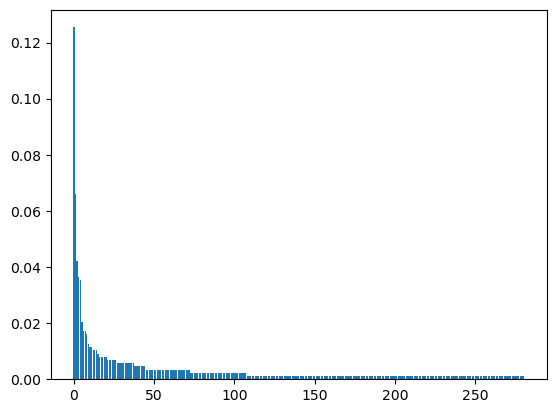

In [19]:
import matplotlib.pyplot as plt

freqs = [bigram[1] for bigram in start_bigrams]
plt.bar(range(len(freqs)), freqs)
plt.show()

### The Temperature
We reweight the distribution over the next word with a temperature following Chollet (2021), _Deep Learning with Python_, 2nd ed., pp. 369 and 373.

Chollet defines the temperature as
$$
    \exp(\frac{\log(x)}{temp}) = x^{\frac{1}{temp}}
$$

In [20]:
def reweight_distribution(original_distribution, temperature=0.5):
    distribution = np.log(original_distribution) / temperature 
    distribution = np.exp(distribution)
    return distribution / np.sum(distribution)

In [21]:
freqs

[0.12542759407069556,
 0.0661345496009122,
 0.04218928164196123,
 0.036488027366020526,
 0.03534777651083238,
 0.020524515393386546,
 0.01710376282782212,
 0.01710376282782212,
 0.01596351197263398,
 0.012542759407069556,
 0.011402508551881414,
 0.011402508551881414,
 0.010262257696693273,
 0.010262257696693273,
 0.010262257696693273,
 0.009122006841505131,
 0.00798175598631699,
 0.00798175598631699,
 0.00798175598631699,
 0.00798175598631699,
 0.00798175598631699,
 0.0068415051311288486,
 0.0068415051311288486,
 0.0068415051311288486,
 0.0068415051311288486,
 0.0068415051311288486,
 0.0068415051311288486,
 0.005701254275940707,
 0.005701254275940707,
 0.005701254275940707,
 0.005701254275940707,
 0.005701254275940707,
 0.005701254275940707,
 0.005701254275940707,
 0.005701254275940707,
 0.005701254275940707,
 0.005701254275940707,
 0.005701254275940707,
 0.004561003420752566,
 0.004561003420752566,
 0.004561003420752566,
 0.004561003420752566,
 0.004561003420752566,
 0.004561003420752

Low temperatures: more deterministic. We freeze the generation

In [22]:
low_temp_freqs = reweight_distribution(freqs, temperature=0.5)

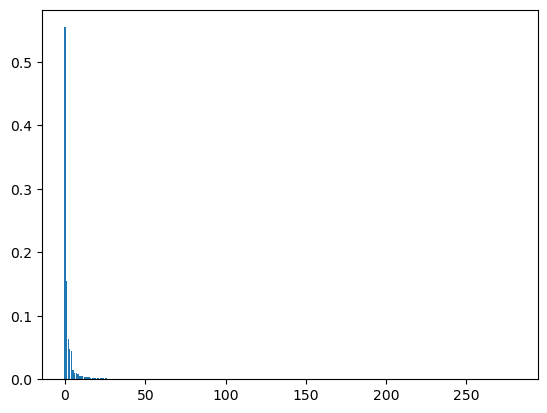

In [23]:
plt.bar(range(len(low_temp_freqs)), low_temp_freqs)
plt.show()

High temperatures: More randomness

In [24]:
high_temp_freqs = reweight_distribution(freqs, temperature=3.0)

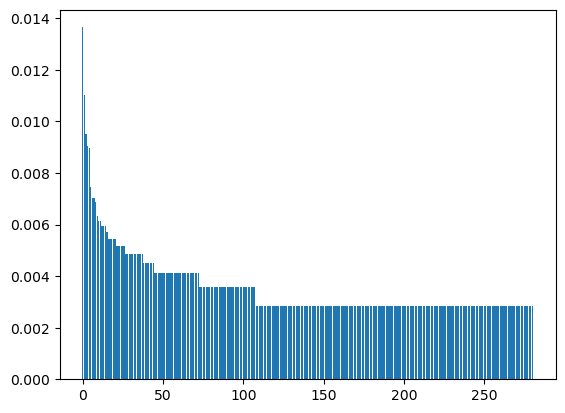

In [25]:
plt.bar(range(len(high_temp_freqs)), high_temp_freqs)
plt.show()

In [26]:
temperature = 3.0

In [27]:
print(start_word, end=' ')
next_word = start_word
for i in range(50):
    cprob = cond_prob(next_word)
    distribution = [i[1] for i in cprob]
    distribution = reweight_distribution(distribution, temperature)
    bigram = cprob[np.argmax(np.random.multinomial(1, distribution))]
    print(bigram[0][1], end=' ')
    next_word = bigram[0][1]

oliver becomes acquainted that minnie from right opposite houses that manner if in master himself reproachfully too worthless and at markets and rustling a harassing proceedings rescued from between life should devote myself one remote on eh god now whether ah good rule was labouring up pray this voice into unwilling 